In [2]:
%pip install ccxt
%pip install h5py

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


   ---------------------------------------- 0.0/2.7 MB ? eta -:--:--
   - -------------------------------------- 0.1/2.7 MB 1.9 MB/s eta 0:00:02
   ------------- -------------------------- 0.9/2.7 MB 11.3 MB/s eta 0:00:01
   ---------------------- ----------------- 1.5/2.7 MB 12.0 MB/s eta 0:00:01
   ------------------------------------ --- 2.5/2.7 MB 14.3 MB/s eta 0:00:01
   ---------------------------------------- 2.7/2.7 MB 14.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import ccxt
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import h5py 
print (ccxt.exchanges)
exchange = ccxt.binance()

['ace', 'alpaca', 'ascendex', 'bequant', 'bigone', 'binance', 'binancecoinm', 'binanceus', 'binanceusdm', 'bingx', 'bit2c', 'bitbank', 'bitbay', 'bitbns', 'bitcoincom', 'bitfinex', 'bitfinex2', 'bitflyer', 'bitforex', 'bitget', 'bithumb', 'bitmart', 'bitmex', 'bitopro', 'bitpanda', 'bitrue', 'bitso', 'bitstamp', 'bitstamp1', 'bittrex', 'bitvavo', 'bl3p', 'blockchaincom', 'btcalpha', 'btcbox', 'btcmarkets', 'btctradeua', 'btcturk', 'bybit', 'cex', 'coinbase', 'coinbaseprime', 'coinbasepro', 'coincheck', 'coinex', 'coinfalcon', 'coinmate', 'coinone', 'coinsph', 'coinspot', 'cryptocom', 'currencycom', 'delta', 'deribit', 'digifinex', 'exmo', 'fmfwio', 'gate', 'gateio', 'gemini', 'hitbtc', 'hitbtc3', 'hollaex', 'huobi', 'huobijp', 'huobipro', 'idex', 'independentreserve', 'indodax', 'kraken', 'krakenfutures', 'kucoin', 'kucoinfutures', 'kuna', 'latoken', 'lbank', 'lbank2', 'luno', 'lykke', 'mercado', 'mexc', 'mexc3', 'ndax', 'novadax', 'oceanex', 'okcoin', 'okex', 'okex5', 'okx', 'paymium'

In [4]:

ticker = exchange.fetch_ticker('BTC/USDT')

current_price = ticker['ask']

print(f'The current price of BTC is {current_price} USDT')

The current price of BTC is 67038.0 USDT


OHLC Data of last 24 hours

In [ ]:
yesterday_time = int((datetime.utcnow() - timedelta(hours=24)).timestamp()) * 1000 # time 24 hours ago in milliseconds
since_time = int((datetime.utcnow() - timedelta(minutes=440)).timestamp()) * 1000 # time since 1000 minutes from 24 hours ago in milliseconds

OHLC = pd.DataFrame(exchange.fetch_ohlcv(
    symbol= 'BTC/USDT',
    timeframe= '1m',
    since= yesterday_time,
    limit= 1000 # max datapoints per call

), columns = ['Time', 'Open', 'High', 'Low', 'Close', 'Volume']
)
OHLC_data_since = pd.DataFrame(exchange.fetch_ohlcv(
    symbol= 'BTC/USDT',
    timeframe= '1m',
    since= since_time,

), columns = ['Time', 'Open', 'High', 'Low', 'Close', 'Volume']
)

combined_OHLC = pd.concat([OHLC, OHLC_data_since], ignore_index=True)


combined_OHLC['Time'] = [datetime.fromtimestamp(float(time)/1000) for time in combined_OHLC['Time']]
combined_OHLC.set_index('Time', inplace=True)

combined_OHLC

,Open,High,Low,Close,Volume
Time,,,,,
2023-10-22 23:27:00,30379.28,30396.78,30379.27,30390.82,23.24136
2023-10-22 23:28:00,30390.82,30418.83,30381.55,30412.75,64.70937
2023-10-22 23:29:00,30412.75,30438.41,30412.74,30429.00,61.22363
2023-10-22 23:30:00,30429.01,30435.80,30379.73,30381.78,32.08511
2023-10-22 23:31:00,30381.78,30412.28,30381.77,30412.28,52.27914
...,...,...,...,...,...
2023-10-23 19:22:00,33024.63,33090.00,32944.48,33083.31,174.52429
2023-10-23 19:23:00,33087.55,33281.94,33080.49,33207.25,246.71409
2023-10-23 19:24:00,33207.25,33251.49,32769.60,33106.69,439.03029


Plotting

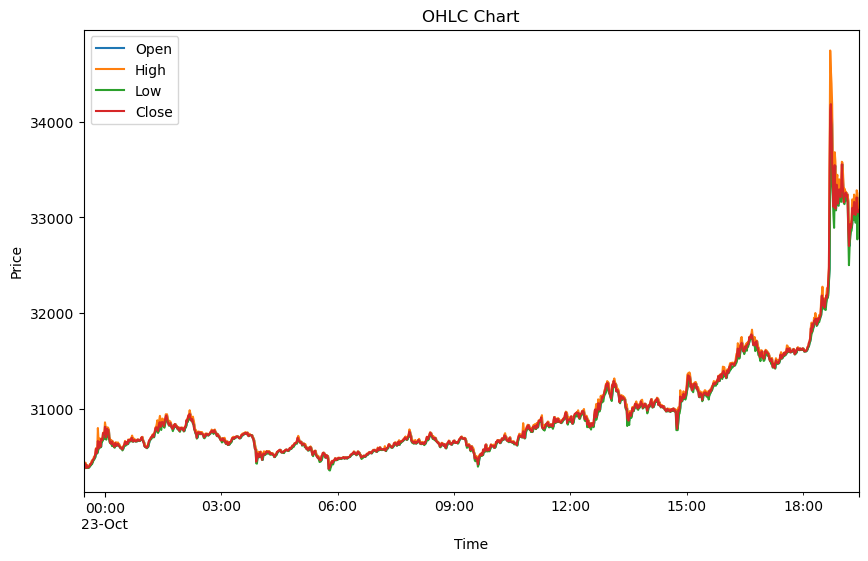

In [ ]:
combined_OHLC[['Open', 'High', 'Low', 'Close']].plot(style='-', figsize=(10, 6))

plt.xlabel('Time')
plt.ylabel('Price')
plt.title('OHLC Chart')

plt.show()


OHLC Data Function

In [ ]:
def get_OHLC_data(symbol, timeframe, time, limit=1000):
    
    since_time = datetime.utcnow() - timedelta(days=time) # Length of time of data from the duration in days since today historically (could change to hours if wanted)
    
    combined_OHLC = pd.DataFrame(columns=['Time', 'Open', 'High', 'Low', 'Close', 'Volume'])
    
    while since_time < datetime.utcnow(): # Looping in increments of limited 1000 calls until since_time reaches the current time
        current_since_time = int(since_time.timestamp()) * 1000
        
        OHLC_data = pd.DataFrame(exchange.fetch_ohlcv(
            symbol=symbol,
            timeframe=timeframe,
            since=current_since_time,
            limit=limit
        ), columns=['Time', 'Open', 'High', 'Low', 'Close', 'Volume'])
        
        combined_OHLC = pd.concat([combined_OHLC, OHLC_data], ignore_index=True)
        
        since_time += timedelta(minutes=(limit * int(timeframe[:-1])))  # Increment by limit minutes
    
    combined_OHLC['Time'] = [datetime.fromtimestamp(float(time)/1000) for time in combined_OHLC['Time']]
    combined_OHLC.set_index('Time', inplace=True)
    
    return combined_OHLC

# Example
symbol = 'BTC/USDT' 
timeframe = '1m'
time = 7 # Number of days since now

OHLC_data = get_OHLC_data(symbol, timeframe, time)
OHLC_data

,Open,High,Low,Close,Volume
Time,,,,,
2023-11-14 06:51:00,36315.39,36322.84,36315.38,36319.96,9.66921
2023-11-14 06:52:00,36319.95,36329.24,36315.51,36319.99,13.81642
2023-11-14 06:53:00,36319.98,36319.99,36305.97,36309.99,5.10105
2023-11-14 06:54:00,36309.99,36329.23,36309.99,36329.23,9.88894
2023-11-14 06:55:00,36329.23,36330.00,36254.88,36256.57,23.76465
...,...,...,...,...,...
2023-11-21 01:46:00,37387.37,37387.38,37381.57,37381.58,4.36200
2023-11-21 01:47:00,37381.57,37383.77,37381.57,37383.53,5.49431
2023-11-21 01:48:00,37383.52,37383.53,37383.52,37383.52,2.88697


Data Quality Checker

In [ ]:
def check_data_quality(df):
    # Check for missing values
    missing_values = df.isnull().sum()

    # Check for duplicates
    duplicates = df.duplicated().sum()
    duplicate_rows = None
    if duplicates != 0:
        duplicate_rows = df[df.duplicated()]
        duplicate_rows = duplicate_rows.groupby(list(df)).apply(lambda x: tuple(x.index)).tolist()

    return {
        "Missing Values": missing_values,
        "Duplicates": duplicate_rows,
    }

Data Check for OHLC Data

In [ ]:
quality_report = check_data_quality(OHLC_data)

print("Data Quality Report:")
for check, result in quality_report.items():
    print(f"\n{check}:\n{result}")

Data Quality Report:

Missing Values:
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

Duplicates:
None


Test if function works for a basic data set with duplicates

In [ ]:
data = {
    'A': [1, 4, 1, 7, 10, 4, 1],
    'B': [2, 5, 2, 8, 11, 5, 2],
    'C': [3, 6, 3, 9, 12, 6, 3]
}

df = pd.DataFrame(data)

check_data_quality(df)

{'Missing Values': A    0
 B    0
 C    0
 dtype: int64,
 'Duplicates': [(2, 6), (5,)]}

Data pulling and compression for BTC

In [19]:
def get_all_OHLC_data(symbol, timeframe, limit=1000):
    combined_OHLC = pd.DataFrame(columns=['Time', 'Open', 'High', 'Low', 'Close', 'Volume'])
    
    while True:  # Continue fetching data until there is no more historical data
        if combined_OHLC.empty:
            since_time = datetime.utcnow() - timedelta(days=365 * 10)  # Start fetching data from 10 years ago
        else:
            since_time = datetime.fromtimestamp(combined_OHLC['Time'].iloc[-1] / 1000) + timedelta(minutes=limit * int(timeframe[:-1]))
            
        current_since_time = int(since_time.timestamp()) * 1000
        
        OHLC_data = pd.DataFrame(exchange.fetch_ohlcv(
            symbol=symbol,
            timeframe=timeframe,
            since=current_since_time,
            limit=limit
        ), columns=['Time', 'Open', 'High', 'Low', 'Close', 'Volume'])
        
        if len(OHLC_data) == 0:
            break  # Break the loop if no more data is available
        
        combined_OHLC = pd.concat([combined_OHLC, OHLC_data], ignore_index=True)
    
    combined_OHLC['Time'] = [datetime.fromtimestamp(float(time) / 1000) for time in combined_OHLC['Time']]
    combined_OHLC.set_index('Time', inplace=True)
    
    return combined_OHLC

symbol = 'BTC/USDT' 
timeframe = '1h'

all_BTC_OHLC_data = get_all_OHLC_data(symbol, timeframe)
all_BTC_OHLC_data

C:\Users\wsq\AppData\Local\Temp\ipykernel_36376\3204819033.py:22: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  combined_OHLC = pd.concat([combined_OHLC, OHLC_data], ignore_index=True)


,Open,High,Low,Close,Volume
Time,,,,,
2017-08-17 00:00:00,4261.48,4313.62,4261.32,4308.83,47.181009
2017-08-17 01:00:00,4308.83,4328.69,4291.37,4315.32,23.234916
2017-08-17 02:00:00,4330.29,4345.45,4309.37,4324.35,7.229691
2017-08-17 03:00:00,4316.62,4349.99,4287.41,4349.99,4.443249
2017-08-17 04:00:00,4333.32,4377.85,4333.32,4360.69,0.972807
...,...,...,...,...,...
2024-03-09 14:00:00,68250.00,68325.00,68146.78,68193.51,626.281020
2024-03-09 15:00:00,68193.51,68350.00,68193.51,68333.24,561.347620
2024-03-09 16:00:00,68333.24,68425.70,68209.59,68376.13,561.273980


In [ ]:
import h5py 

symbol = 'BTC/USDT' 

def HDF5_converter(dataset, symbol):
    with h5py.File('/Users/wsq/Desktop/Jupyter/minute-data-fetcher/h5_compressed_data_warehouse.h5', 'w') as hdf:
        group = hdf.create_group('Token_Warehouse') # Outermost group for all potential tokens
        symbol_group = group.create_group(f'{symbol}_group') # Subgroup for each token due to splitting datetime and OHLC data

        datetime_index_np = dataset.index.values.astype(h5py.opaque_dtype(dataset.index.dtype))

        symbol_group.create_dataset('datetime_index', data=datetime_index_np, compression="gzip", compression_opts=9)

        symbol_group.create_dataset('symbol', data = dataset, compression="gzip", compression_opts=9)


HDF5_converter(all_BTC_OHLC_data, symbol)

with h5py.File('/Users/wsq/Desktop/Jupyter/minute-data-fetcher/h5_compressed_data_warehouse.h5', 'r') as hdf:
    datetime_index = pd.to_datetime(hdf['Token_Warehouse'][f'{symbol}_group']['datetime_index'][:])
    
    data = hdf['Token_Warehouse'][f'{symbol}_group']['symbol'][:]
    
    read_data = pd.DataFrame(data, index=datetime_index, columns=all_BTC_OHLC_data.columns)
    
    print("Read Data:")
    print(read_data)

Read Data:
                         Open      High       Low     Close       Volume
2017-08-17 00:00:00   4261.48   4313.62   4261.32   4308.83    47.181009
2017-08-17 01:00:00   4308.83   4328.69   4291.37   4315.32    23.234916
2017-08-17 02:00:00   4330.29   4345.45   4309.37   4324.35     7.229691
2017-08-17 03:00:00   4316.62   4349.99   4287.41   4349.99     4.443249
2017-08-17 04:00:00   4333.32   4377.85   4333.32   4360.69     0.972807
...                       ...       ...       ...       ...          ...
2023-11-20 21:00:00  37600.61  37649.44  37419.57  37452.34  1203.934890
2023-11-20 22:00:00  37452.33  37555.99  37399.99  37464.86   827.177770
2023-11-20 23:00:00  37464.86  37480.17  37388.00  37389.98   439.333590
2023-11-21 00:00:00  37389.99  37398.81  37316.00  37355.89   676.296470
2023-11-21 01:00:00  37355.90  37411.10  37322.00  37375.09   505.493320

[53914 rows x 5 columns]


Mutiple token data fetcher

In [ ]:
def get_mutiple_all_OHLC_data(symbols, timeframe, limit=1000):
    all_combined_OHLC = {}

    for symbol in symbols:
        combined_OHLC = pd.DataFrame(columns=['Time', 'Open', 'High', 'Low', 'Close', 'Volume'])

        while True:  # Continue fetching data until there is no more historical data
            if combined_OHLC.empty:
                since_time = datetime.utcnow() - timedelta(days=365 * 10)  # Start fetching data from 10 years ago
            else:
                since_time = datetime.fromtimestamp(combined_OHLC['Time'].iloc[-1] / 1000) + timedelta(minutes=limit * int(timeframe[:-1]))

            current_since_time = int(since_time.timestamp()) * 1000

            OHLC_data = pd.DataFrame(exchange.fetch_ohlcv(
                symbol=symbol,
                timeframe=timeframe,
                since=current_since_time,
                limit=limit
            ), columns=['Time', 'Open', 'High', 'Low', 'Close', 'Volume'])

            if len(OHLC_data) == 0:
                break  # Break the loop if no more data is available

            combined_OHLC = pd.concat([combined_OHLC, OHLC_data], ignore_index=True)

        combined_OHLC['Time'] = [datetime.fromtimestamp(float(time) / 1000) for time in combined_OHLC['Time']]
        combined_OHLC.set_index('Time', inplace=True)

        all_combined_OHLC[symbol] = combined_OHLC

    return all_combined_OHLC

# Example usage for fetching data for 10 coins
symbols = ['BTC/USDT', 'ETH/USDT', 'BNB/USDT', 'XRP/USDT', 'SOL/USDT', 'ADA/USDT', 'DOGE/USDT', 'TRX/USDT', 'LINK/USDT', 'AVAX/USDT']
timeframe = '1m' 

all_coins_data = get_mutiple_all_OHLC_data(symbols, timeframe)

In [ ]:
btc_data = all_coins_data['BTC/USDT']

btc_data

,Open,High,Low,Close,Volume
Time,,,,,
2017-08-17 00:00:00,4261.48,4261.48,4261.48,4261.48,1.775183
2017-08-17 00:01:00,4261.48,4261.48,4261.48,4261.48,0.000000
2017-08-17 00:02:00,4280.56,4280.56,4280.56,4280.56,0.261074
2017-08-17 00:03:00,4261.48,4261.48,4261.48,4261.48,0.012008
2017-08-17 00:04:00,4261.48,4261.48,4261.48,4261.48,0.140796
...,...,...,...,...,...
2023-11-23 05:32:00,37509.67,37515.68,37507.91,37507.92,18.370290
2023-11-23 05:33:00,37507.91,37515.68,37501.10,37501.10,11.051480
2023-11-23 05:34:00,37501.11,37501.11,37485.99,37486.00,10.619080


Multiple token converter

In [ ]:
def HDF5_converter(all_datasets, output_path='/Users/wsq/Desktop/Jupyter/minute-data-fetcher/h5_compressed_data_warehouse.h5'):
    with h5py.File(output_path, 'w') as hdf:
        group = hdf.create_group('Token_Warehouse')  # Outermost group for all potential tokens

        for symbol, dataset in all_datasets.items():
            symbol_group = group.create_group(f'{symbol}_group')  # Subgroup for each token due to splitting datetime and OHLC data

            # Convert the datetime index to a NumPy array with opaque dtype
            datetime_index_np = dataset.index.values.astype(h5py.opaque_dtype(dataset.index.dtype))

            # Save the datetime index as a separate dataset
            symbol_group.create_dataset('datetime_index', data=datetime_index_np, compression="gzip", compression_opts=9)

            # Save the main dataset
            symbol_group.create_dataset('symbol', data=dataset.values, compression="gzip", compression_opts=9)


HDF5_converter(all_coins_data)

Basic Test

In [ ]:
with h5py.File('/Users/wsq/Desktop/Jupyter/minute-data-fetcher/h5_compressed_data_warehouse.h5', 'r') as hdf:
    print("File Structure:")
    print(list(hdf.keys()))
    

File Structure:
['Token_Warehouse']


In [ ]:
with h5py.File(
    '/Users/wsq/Desktop/Jupyter/minute-data-fetcher"/h5_compressed_data_warehouse.h5',
    "r",
) as hdf:
    if "Token_Warehouse" in hdf:
        print("'Token_Warehouse' group exists.")
        symbol_group = hdf["Token_Warehouse"]["BTC/USDT_group"]
        if "symbol" in symbol_group:
            print("'symbol' dataset exists.")
        else:
            print("'symbol' dataset does not exist.")
    else:
        print("'Token_Warehouse' group does not exist.")

'Token_Warehouse' group exists.
'symbol' dataset exists.


# Utilizing Token Warehouse for Pairs Trading Strategy

#### ETH and BTC

##### ETH and BTC Plot for Time Series of Minute Data

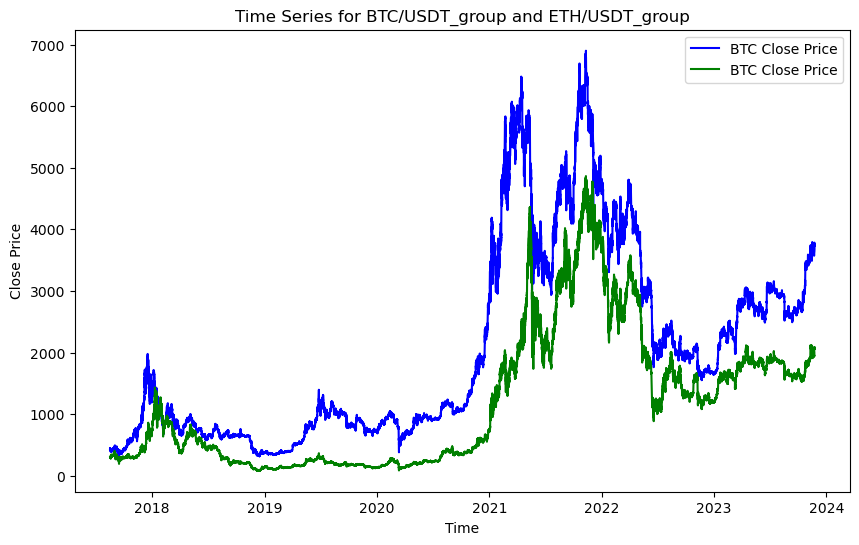

In [ ]:
import h5py
import pandas as pd
import matplotlib.pyplot as plt

token_1 = 'BTC/USDT_group'
token_2 = 'ETH/USDT_group'

with h5py.File('h5_compressed_data_warehouse.h5', 'r') as hdf:
    BTC_data = hdf[f'/Token_Warehouse/{token_1}']
    ETH_data = hdf[f'/Token_Warehouse/{token_2}']
    
    datetime_index_np = BTC_data['datetime_index'][:]

    BTC_symbol_data = BTC_data['symbol'][:]
    ETH_symbol_data = ETH_data['symbol'][:]

    # Convert the opaque dtype back to datetime
    datetime_index = pd.to_datetime(datetime_index_np, unit='ns')

    # Creating a DataFrame
    df1 = pd.DataFrame(BTC_symbol_data, index=datetime_index, columns=['Open', 'High', 'Low', 'Close', 'Volume'])
    df2 = pd.DataFrame(ETH_symbol_data, index=datetime_index, columns=['Open', 'High', 'Low', 'Close', 'Volume'])

    # Plotting the time series line graph
    plt.figure(figsize=(10, 6))
    plt.plot(df1.index, df1['Close']/10, label='BTC Close Price', color='blue') #Scaled BTC close prices down by a factor of 10 to make the relationship more evident
    plt.plot(df2.index, df2['Close'], label='BTC Close Price', color='green')
    plt.xlabel('Time')
    plt.ylabel('Close Price')
    plt.title(f'Time Series for {token_1} and {token_2}')
    plt.legend()
    plt.show()

Function to make opening h5 easier

In [3]:
def process_h5_file_close_data(file_path, group_path):

    with h5py.File(file_path, 'r') as hdf:
        # Access the necessary datasets
        datetime_index = hdf[f'{group_path}/datetime_index'][:]
        close_prices = hdf[f'{group_path}/symbol'][:, 3]

        # Create a DataFrame
        df = pd.DataFrame(close_prices, index=pd.to_datetime(datetime_index, unit='ns'), columns=['Close'])
    
    return df

eth = process_h5_file_close_data('h5_compressed_data_warehouse.h5', 'Token_Warehouse/ETH/USDT_group')


btc = process_h5_file_close_data('h5_compressed_data_warehouse.h5', 'Token_Warehouse/BTC/USDT_group')
btc

,Close
2017-08-17 00:00:00,4261.48
2017-08-17 00:01:00,4261.48
2017-08-17 00:02:00,4280.56
2017-08-17 00:03:00,4261.48
2017-08-17 00:04:00,4261.48
...,...
2023-11-23 05:32:00,37507.92
2023-11-23 05:33:00,37501.10
2023-11-23 05:34:00,37486.00
2023-11-23 05:35:00,37460.02


Testing and Training data with a 20/80 split where training is the most recent data and further data processing

In [59]:
from sklearn.model_selection import train_test_split

btc_train, btc_test = train_test_split(btc, test_size=0.2, shuffle=False)

eth_train, eth_test = train_test_split(eth, test_size=0.2, shuffle=False)

eth_train_returns = eth_train["Close"] / eth_train["Close"].shift(1) * 100

eth_train_returns = np.log(eth_train_returns).dropna()

btc_train_returns = btc_train["Close"] / btc_train["Close"].shift(1) * 100

btc_train_returns = np.log(btc_train_returns).dropna()


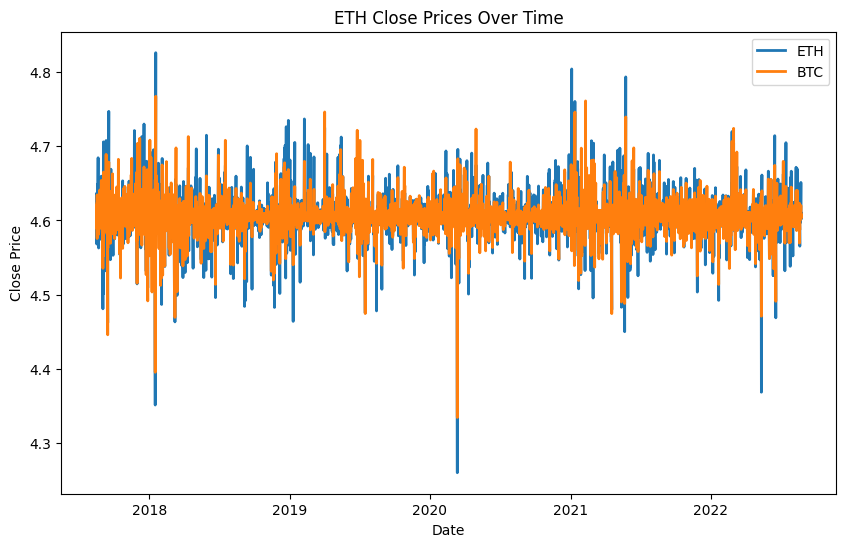

In [60]:
plt.figure(figsize=(10, 6))

# Plot ETH Close values
plt.plot(eth_train_returns.index, eth_train_returns.values, label='ETH', linewidth=2)
plt.plot(btc_train_returns.index, btc_train_returns.values, label='BTC', linewidth=2)

# Set labels and title
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('ETH Close Prices Over Time')

# Add legend
plt.legend()

# Show the plot
plt.show()

Linear Regression

In [61]:
from sklearn.linear_model import LinearRegression

df_returns = pd.DataFrame({'ETH': eth_train_returns, 'BTC': btc_train_returns})

x_train = df_returns[['BTC']]
y_train = df_returns['ETH']

model = LinearRegression()

model.fit(x_train, y_train)

model.score(x_train, y_train) #R^2

coef = model.coef_[0]

intercept = model.intercept_

print(intercept)
print(coef)

errors = y_train - (coef * x_train["BTC"] + intercept)

0.8082721361871856
0.8244859926773564


Charting the errors

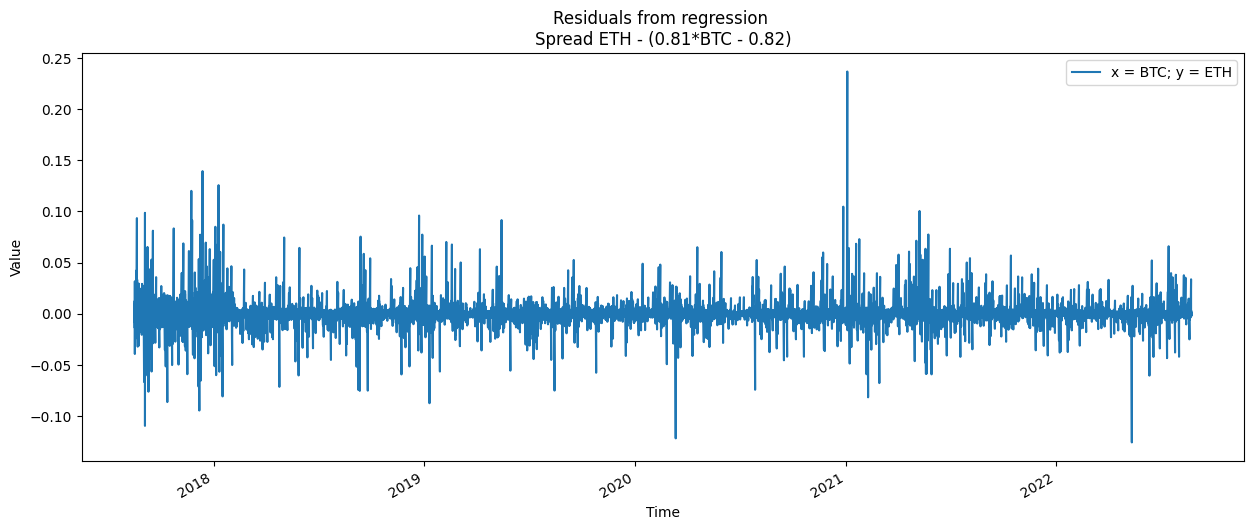

In [62]:
plt.figure(figsize=(15, 6))
errors.plot(label = "x = BTC; y = ETH")
plt.title("Residuals from regression \nSpread ETH - (0.81*BTC - 0.82)")
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

Dickey Fuller test (Testing for unit root in AR model (Stationarity))

In [63]:
from statsmodels.tsa.stattools import adfuller



dftest = adfuller(errors, maxlag=1)
dfoutput = pd.Series(dftest[0:4],
                     index=["Test Stat", "P-Val", "#Lags Used", "#Obs Used",],)
critical_values = pd.Series(dftest[4].values(), index=dftest[4].keys())

print(f"Dikey Fuller Results:\n{dfoutput} \n\nDikey Fuller Critical Values:\n{critical_values}")



Dikey Fuller Results:
Test Stat    -9.344814e+02
P-Val         0.000000e+00
#Lags Used    1.000000e+00
#Obs Used     1.317597e+06
dtype: float64 

Dikey Fuller Critical Values:
1%    -3.430355
5%    -2.861542
10%   -2.566771
dtype: float64


###### This means that we reject the null at all significant values that the model is non-stationary

Z-Score and Signals starting with 1.2 and -1.2 Thresholds

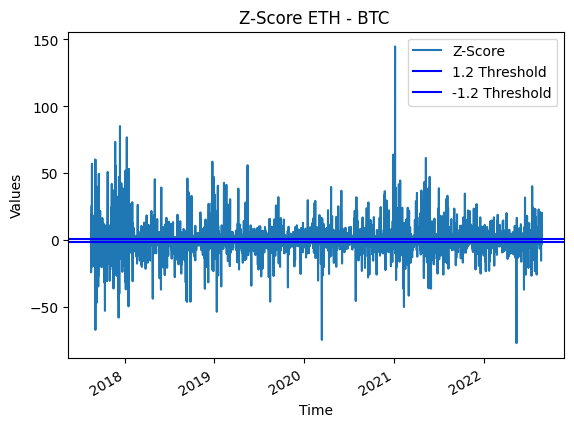

In [64]:
spread = errors
zscore =(spread - np.mean(spread)) / np.std(spread)
zscore.plot(label="Z-Score")
plt.title("Z-Score ETH - BTC ")
plt.xlabel('Time')
plt.ylabel('Values')
plt.axhline(y =1.2, color ='b', label='1.2 Threshold')
plt.axhline(y =-1.2, color ='b', label='-1.2 Threshold')
plt.legend()
plt.show()

Backtest on training data

In [65]:
# Long the spread: short ETH, long BTC
# Short the spread: long ETH, short BTC



signal_entry = 1.2
signal_exit = 0


btest = pd.DataFrame()
btest["ETH"] = eth_train["Close"]
btest["BTC"] = btc_train["Close"]

btest = btest.iloc[1:]

btest["Short Signal"] = (zscore > signal_entry) & (zscore.shift(1) < signal_entry)
btest["Short Exit"] = (zscore < signal_exit) & (zscore.shift(1) > signal_exit)

btest["Long Signal"] = (zscore < -signal_entry) & (zscore.shift(1) > -signal_entry)
btest["Long Exit"] = (zscore > -signal_exit) & (zscore.shift(1) < -signal_exit)



Backtest

In [66]:
spread_side = None; counter = -1
backtest_result = []; indicator = 0
for time, signals_stock in btest.iterrows():
    counter += 1
    eth_, btc_,  short_sig, short_ex, long_sig, long_ex = signals_stock

    if spread_side == None:
        eth_return = 0
        btc_return = 0
        backtest_result.append([time, eth_return, btc_return, spread_side])
    
        if short_sig == True:
            spread_side = "short"
        elif long_sig == True:
            spread_side = "long"

    elif spread_side == "long":
        eth_return = btest["ETH"][counter] / btest["ETH"][counter -1] - 1.
        btc_return = btest["BTC"][counter] / btest["BTC"][counter -1] - 1.
        backtest_result.append([time, eth_return, -btc_return, spread_side])

        if long_ex == True:
            spread_side = None
    
    elif spread_side == "short":
        eth_return = btest["ETH"][counter] / btest["ETH"][counter -1] - 1.
        btc_return = btest["BTC"][counter] / btest["BTC"][counter -1] - 1.
        backtest_result.append([time, -eth_return, btc_return, spread_side])

        if short_ex == True:
            spread_side =None



C:\Users\wsq\AppData\Local\Temp\ipykernel_36376\1182627527.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  eth_return = btest["ETH"][counter] / btest["ETH"][counter -1] - 1.
C:\Users\wsq\AppData\Local\Temp\ipykernel_36376\1182627527.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  btc_return = btest["BTC"][counter] / btest["BTC"][counter -1] - 1.
C:\Users\wsq\AppData\Local\Temp\ipykernel_36376\1182627527.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value b

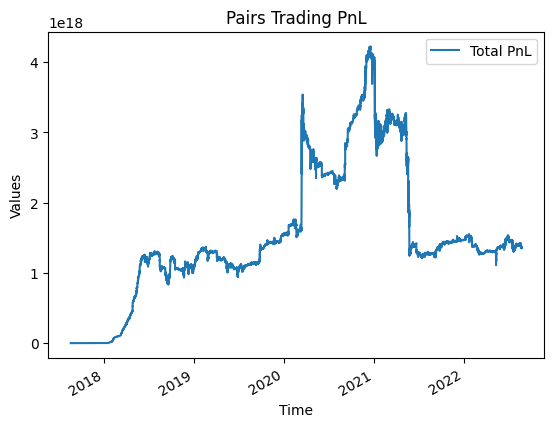

In [67]:
backtest_pd = pd.DataFrame(backtest_result)
backtest_pd.columns = ["Date", "ETH", "BTC", "Side"]
backtest_pd["ETH PnL"] = np.cumprod(backtest_pd["ETH"] + 1)
backtest_pd["BTC PnL"] = np.cumprod(backtest_pd["BTC"] + 1)
backtest_pd["Total PnL"] = (backtest_pd["BTC PnL"] + backtest_pd["ETH PnL"]) / 2
backtest_pd.index = backtest_pd["Date"]

backtest_pd[["Total PnL"]].plot(label = "Evolution of Profit and Loss")
plt.title("Pairs Trading PnL")
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()
plt.show()

### Backtest on Test Data

In [68]:
eth_test_returns = eth_test["Close"] / eth_test["Close"].shift(1) * 100

eth_test_returns = np.log(eth_test_returns).dropna()

btc_test_returns = btc_test["Close"] / btc_test["Close"].shift(1) * 100

btc_test_returns = np.log(btc_test_returns).dropna()


df_test_returns = pd.DataFrame({'ETH': eth_test_returns, 'BTC': btc_test_returns})

x_test = df_test_returns[['BTC']]
y_test = df_test_returns['ETH']

errors_test = y_test - (coef * x_test["BTC"] + intercept)

spread = errors_test
zscore =(spread - np.mean(spread)) / np.std(spread)

In [16]:
signal_entry = 1.2
signal_exit = 0


btest = pd.DataFrame()
btest["ETH"] = eth_test["Close"]
btest["BTC"] = btc_test["Close"]

btest = btest.iloc[1:]

btest["Short Signal"] = (zscore > signal_entry) & (zscore.shift(1) < signal_entry)
btest["Short Exit"] = (zscore < signal_exit) & (zscore.shift(1) > signal_exit)

btest["Long Signal"] = (zscore < -signal_entry) & (zscore.shift(1) > -signal_entry)
btest["Long Exit"] = (zscore > -signal_exit) & (zscore.shift(1) < -signal_exit)


spread_side = None; counter = -1
backtest_result = []; indicator = 0
for time, signals_stock in btest.iterrows():
    counter += 1
    eth_, btc_, short_sig, short_ex, long_sig, long_ex = signals_stock

    if spread_side == None:
        eth_return = 0
        btc_return = 0
        backtest_result.append([time, eth_return, btc_return, spread_side])
    
        if short_sig == True:
            spread_side = "short"
        elif long_sig == True:
            spread_side = "long"

    elif spread_side == "long":
        eth_return = btest["ETH"][counter] / btest["ETH"][counter -1] - 1.
        btc_return = btest["BTC"][counter] / btest["BTC"][counter -1] - 1.
        backtest_result.append([time, eth_return, -btc_return, spread_side])

        if long_ex == True:
            spread_side = None
    
    elif spread_side == "short":
        eth_return = btest["ETH"][counter] / btest["ETH"][counter -1] - 1.
        btc_return = btest["BTC"][counter] / btest["BTC"][counter -1] - 1.
        backtest_result.append([time, -eth_return, btc_return, spread_side])

        if short_ex == True:
            spread_side =None
            
backtest_result

C:\Users\wsq\AppData\Local\Temp\ipykernel_36376\2777511679.py:35: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  eth_return = btest["ETH"][counter] / btest["ETH"][counter -1] - 1.
C:\Users\wsq\AppData\Local\Temp\ipykernel_36376\2777511679.py:36: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  btc_return = btest["BTC"][counter] / btest["BTC"][counter -1] - 1.
C:\Users\wsq\AppData\Local\Temp\ipykernel_36376\2777511679.py:43: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value b

[[Timestamp('2022-08-23 06:47:00'), 0, 0, None],
 [Timestamp('2022-08-23 06:48:00'), 0, 0, None],
 [Timestamp('2022-08-23 06:49:00'), 0, 0, None],
 [Timestamp('2022-08-23 06:50:00'),
  -0.0008521437323896208,
  0.00042485708396611255,
  'long'],
 [Timestamp('2022-08-23 06:51:00'),
  -0.0008528705006410897,
  0.0008435290938048068,
  'long'],
 [Timestamp('2022-08-23 06:52:00'),
  0.0008785210938522248,
  -0.0008479850994229654,
  'long'],
 [Timestamp('2022-08-23 06:53:00'), 0, 0, None],
 [Timestamp('2022-08-23 06:54:00'),
  0.0010751151243219015,
  -0.0008121705081692854,
  'short'],
 [Timestamp('2022-08-23 06:55:00'), 0, 0, None],
 [Timestamp('2022-08-23 06:56:00'), 0, 0, None],
 [Timestamp('2022-08-23 06:57:00'),
  0.0007828518173346177,
  -0.0003904938111869427,
  'short'],
 [Timestamp('2022-08-23 06:58:00'), 0, 0, None],
 [Timestamp('2022-08-23 06:59:00'), 0, 0, None],
 [Timestamp('2022-08-23 07:00:00'), 0, 0, None],
 [Timestamp('2022-08-23 07:01:00'), 0, 0, None],
 [Timestamp('2022

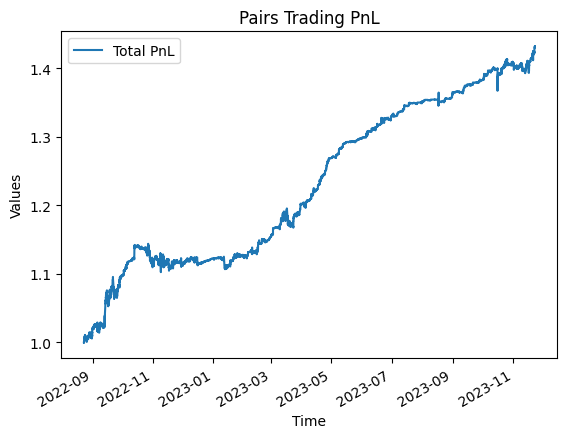

In [15]:
backtest_pd = pd.DataFrame(backtest_result)
backtest_pd.columns = ["Date", "ETH", "BTC", "Side"]
backtest_pd["ETH PnL"] = np.cumprod(backtest_pd["ETH"] + 1)
backtest_pd["BTC PnL"] = np.cumprod(backtest_pd["BTC"] + 1)
backtest_pd["Total PnL"] = (backtest_pd["BTC PnL"] + backtest_pd["ETH PnL"]) / 2
backtest_pd.index = backtest_pd["Date"]

backtest_pd[["Total PnL"]].plot(label = "Evolution of Profit and Loss for Test Data")
plt.title("Pairs Trading PnL")
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()
plt.show()

#### Generalizing the process 

In [71]:
def process_returns(data, value: str):
    """Process PD DF with Close values column to get log relative returns of Close values to return a new dataframe """
    asset_returns = data[value] / data[value].shift(1) * 100

    asset_returns = np.log(asset_returns).dropna()

    return asset_returns

def regress_for_values(Y_coin_returns, X_coin_returns):
    """Linear Regression for"""
    df_returns = pd.DataFrame({'Y': Y_coin_returns, 'X': X_coin_returns})

    x_train = df_returns[['X']]
    y_train = df_returns['Y']

    model = LinearRegression()

    model.fit(x_train, y_train)

    coef = model.coef_[0]

    intercept = model.intercept_

    errors = y_train - (coef * x_train["X"] + intercept)

    return errors

def regress_for_values_test(y_test_ret, x_test_ret, y_train_ret, x_train_ret):
    """Helper for getting errors of test data given training data"""
    df_returns = pd.DataFrame({'Y': y_train_ret, 'X': x_train_ret})

    x_train = df_returns[['X']]
    y_train = df_returns['Y']

    model = LinearRegression()

    model.fit(x_train, y_train)

    coef = model.coef_[0]

    intercept = model.intercept_

    df_test_returns = pd.DataFrame({'Y': y_test_ret, 'X': x_test_ret})

    x_test = df_test_returns[['X']]
    y_test = df_test_returns['Y']

    errors_test = y_test - (coef * x_test["X"] + intercept)

    return errors_test


def adfuller_test(errors, sig_lvl="1%"):
    """adfuller test to test wether or not their exists cointegration at the 1% level. True if test stat > 1% significance critical value"""
    dftest = adfuller(errors, maxlag=1)
    dfoutput = pd.Series(dftest[0:4],
                        index=["Test Stat", "P-Val", "#Lags Used", "#Obs Used",],)
    critical_values = pd.Series(dftest[4].values(), index=dftest[4].keys())

    return dfoutput["Test Stat"] < critical_values[sig_lvl]


def backtest(errors, signal_entry, signal_exit, X_data, Y_data, value):
    """Backtesting Process"""
    spread = errors
    zscore =(spread - np.mean(spread)) / np.std(spread)
    
    btest = pd.DataFrame()
    btest["Y"] = Y_data[value]
    btest["X"] = X_data[value]

    btest = btest.iloc[1:]

    btest["Short Signal"] = (zscore > signal_entry) & (zscore.shift(1) < signal_entry)
    btest["Short Exit"] = (zscore < signal_exit) & (zscore.shift(1) > signal_exit)

    btest["Long Signal"] = (zscore < -signal_entry) & (zscore.shift(1) > -signal_entry)
    btest["Long Exit"] = (zscore > -signal_exit) & (zscore.shift(1) < -signal_exit)

    spread_side = None; counter = -1
    backtest_result = []; indicator = 0
    for time, signals_stock in btest.iterrows():
        counter += 1
        y_, x_, short_sig, short_ex, long_sig, long_ex = signals_stock

        if spread_side == None:
            y_return = 0
            x_return = 0
            backtest_result.append([time, y_return, x_return, spread_side])
        
            if short_sig == True:
                spread_side = "short"
            elif long_sig == True:
                spread_side = "long"

        elif spread_side == "long":
            y_return = btest["Y"][counter] / btest["Y"][counter -1] - 1.
            x_return = btest["X"][counter] / btest["X"][counter -1] - 1.
            backtest_result.append([time, y_return, -x_return, spread_side])

            if long_ex == True:
                spread_side = None
        
        elif spread_side == "short":
            y_return = btest["Y"][counter] / btest["Y"][counter -1] - 1.
            x_return = btest["X"][counter] / btest["X"][counter -1] - 1.
            backtest_result.append([time, -y_return, x_return, spread_side])

            if short_ex == True:
                spread_side =None

    return backtest_result


def show_PnL(backtest_result):
    """Showing PnL result"""
    backtest_pd = pd.DataFrame(backtest_result)
    backtest_pd.columns = ["Date", "Y", "X", "Side"]
    backtest_pd["Y PnL"] = np.cumprod(backtest_pd["Y"] + 1)
    backtest_pd["X PnL"] = np.cumprod(backtest_pd["X"] + 1)
    backtest_pd["Total PnL"] = (backtest_pd["Y PnL"] + backtest_pd["X PnL"]) / 2
    backtest_pd.index = backtest_pd["Date"]

    backtest_pd[["Total PnL"]].plot(label = "Evolution of Profit and Loss for Data")
    plt.title("Pairs Trading PnL")
    plt.xlabel('Time')
    plt.ylabel('Values')
    plt.legend()
    plt.show()


#need to split into training and testing sets before this

def pair_trade_result(data_x_train, data_y_train, data_x_test, data_y_test, value="Close", signal_entry=1.2, signal_exit=0, sig_level="1%"):
    """Full Function from start to finish"""
    x_returns = process_returns(data_x_train, value)
    y_returns = process_returns(data_y_train, value)

    x_returns_test = process_returns(data_x_test, value)
    y_returns_test = process_returns(data_y_test, value)

    errors_train = regress_for_values(y_returns, x_returns)
    errors_test = regress_for_values_test(y_returns_test, x_returns_test, y_returns, x_returns)

    if adfuller_test(errors, sig_lvl=sig_level) is False:
        dftest = adfuller(errors, maxlag=1)
        dfoutput = pd.Series(dftest[0:4],
                            index=["Test Stat", "P-Val", "#Lags Used", "#Obs Used",],)
        critical_values = pd.Series(dftest[4].values(), index=dftest[4].keys())

        print(f"Dikey Fuller Results:\n{dfoutput} \n\nDikey Fuller Critical Values:\n{critical_values}")
        
        print(f"No cointegration exists for this asset pair at the {sig_level} significance level")
        return
    
    results_train = backtest(errors_train, signal_entry, signal_exit, data_x_train, data_y_train, value)

    results_test = backtest(errors_test, signal_entry, signal_exit, data_x_test, data_y_test, value)

    print("Training PnL")
    show_PnL(results_train)
    
    print("Test PnL")
    show_PnL(results_test)



Trying ETH, BTC day data

C:\Users\wsq\AppData\Local\Temp\ipykernel_36376\3204819033.py:22: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  combined_OHLC = pd.concat([combined_OHLC, OHLC_data], ignore_index=True)
C:\Users\wsq\AppData\Local\Temp\ipykernel_36376\3204819033.py:22: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  combined_OHLC = pd.concat([combined_OHLC, OHLC_data], ignore_index=True)
C:\Users\wsq\AppData\Local\Temp\ipykernel_36376\988536378.py:105: FutureWarning: Series.__getitem__ treating keys as positions is 

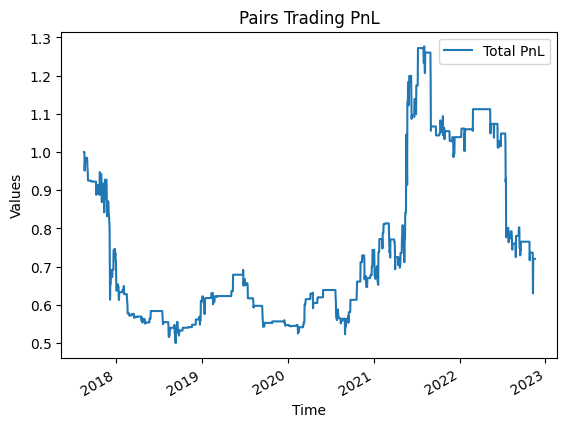

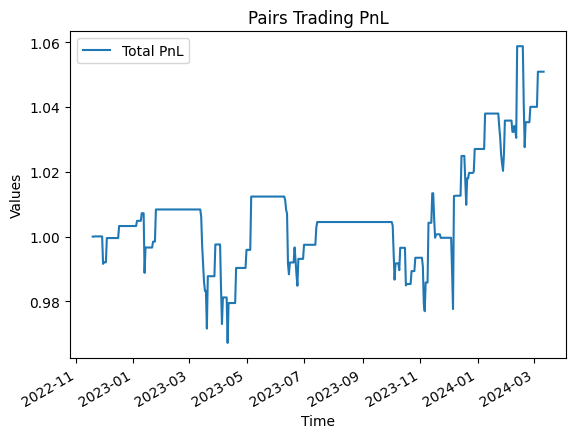

In [72]:
timeframe = '1d'

all_BTC_Day_Data= get_all_OHLC_data('BTC/USDT', timeframe)

all_ETH_Day_Data= get_all_OHLC_data('ETH/USDT', timeframe)

btc_train_1, btc_test_1 = train_test_split(all_BTC_Day_Data, test_size=0.2, shuffle=False)

eth_train_1, eth_test_1 = train_test_split(all_ETH_Day_Data, test_size=0.2, shuffle=False)

pair_trade_result(btc_train_1, eth_train_1, btc_test_1, eth_test_1)

Trying ETH, BTC hour data

C:\Users\wsq\AppData\Local\Temp\ipykernel_36376\3204819033.py:22: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  combined_OHLC = pd.concat([combined_OHLC, OHLC_data], ignore_index=True)
C:\Users\wsq\AppData\Local\Temp\ipykernel_36376\3204819033.py:22: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  combined_OHLC = pd.concat([combined_OHLC, OHLC_data], ignore_index=True)
C:\Users\wsq\AppData\Local\Temp\ipykernel_36376\988536378.py:105: FutureWarning: Series.__getitem__ treating keys as positions is 

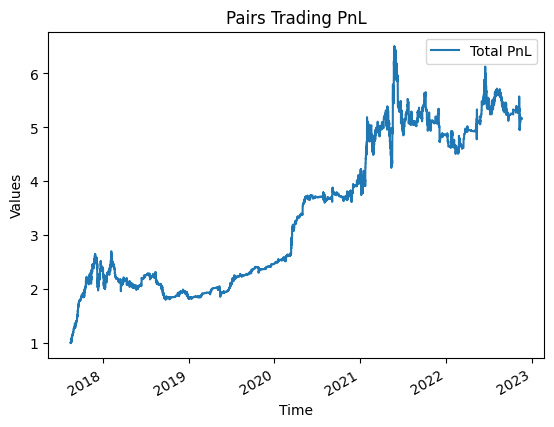

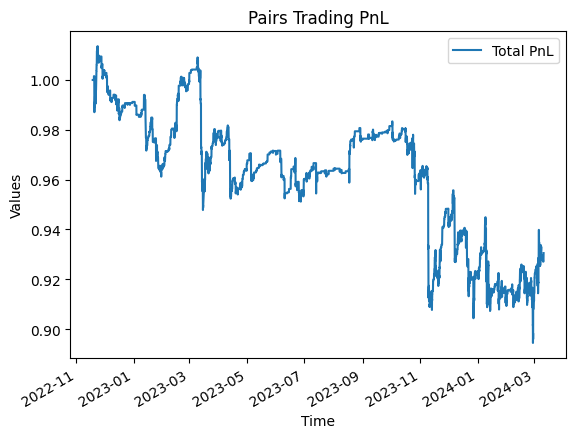

In [73]:
timeframe = '1h'

all_BTC_Day_Data= get_all_OHLC_data('BTC/USDT', timeframe)

all_ETH_Day_Data= get_all_OHLC_data('ETH/USDT', timeframe)

btc_train_2, btc_test_2 = train_test_split(all_BTC_Day_Data, test_size=0.2, shuffle=False)

eth_train_2, eth_test_2 = train_test_split(all_ETH_Day_Data, test_size=0.2, shuffle=False)

eth_train_2, eth_test_2

pair_trade_result(btc_train_2, eth_train_2, btc_test_2, eth_test_2)